# Audio File Investigation: AUDIO_all.wav vs AUDIO_all_clean.wav
Thoroughly compare and analyze the two audio files to verify their labels (noisy vs clean)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile
from scipy import signal, stats
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

print("="*80)
print("AUDIO FILE INVESTIGATION")
print("="*80)
print("\nComparing:")
print("  1. AUDIO_all.wav (supposedly NOISY)")
print("  2. AUDIO_all_clean_2.wav (supposedly CLEAN)")

AUDIO FILE INVESTIGATION

Comparing:
  1. AUDIO_all.wav (supposedly NOISY)
  2. AUDIO_all_clean_2.wav (supposedly CLEAN)


## Step 1: Load Both Audio Files

In [27]:
# Load audio files
sr = 44100  # Standard sample rate

try:
    y_noisy, sr_noisy = librosa.load('data/AUDIO_all.wav', sr=sr)
    print(f"✓ AUDIO_all.wav loaded successfully")
    print(f"  Samples: {len(y_noisy)}")
    print(f"  Duration: {len(y_noisy)/sr:.2f}s")
    print(f"  Sample rate: {sr_noisy}")
except Exception as e:
    print(f"✗ Failed to load AUDIO_all.wav: {e}")
    y_noisy = None

print()

try:
    y_clean, sr_clean = librosa.load('data/AUDIO_all_clean_2.wav', sr=sr)
    print(f"✓ AUDIO_all_clean.wav loaded successfully")
    print(f"  Samples: {len(y_clean)}")
    print(f"  Duration: {len(y_clean)/sr:.2f}s")
    print(f"  Sample rate: {sr_clean}")
except Exception as e:
    print(f"✗ Failed to load AUDIO_all_clean.wav: {e}")
    y_clean = None

✓ AUDIO_all.wav loaded successfully
  Samples: 265235484
  Duration: 6014.41s
  Sample rate: 44100

✓ AUDIO_all_clean.wav loaded successfully
  Samples: 265235484
  Duration: 6014.41s
  Sample rate: 44100


## Step 2: Basic Audio Statistics

In [28]:
if y_noisy is not None and y_clean is not None:
    print("="*80)
    print("AMPLITUDE STATISTICS")
    print("="*80)
    
    # Calculate statistics for both files
    noisy_rms = np.sqrt(np.mean(y_noisy**2))
    clean_rms = np.sqrt(np.mean(y_clean**2))
    
    noisy_peak = np.max(np.abs(y_noisy))
    clean_peak = np.max(np.abs(y_clean))
    
    noisy_std = np.std(y_noisy)
    clean_std = np.std(y_clean)
    
    noisy_mean = np.mean(y_noisy)
    clean_mean = np.mean(y_clean)
    
    # Create comparison dataframe
    comparison = pd.DataFrame({
        'AUDIO_all (noisy)': [
            noisy_rms,
            clean_rms,
            noisy_peak,
            clean_peak,
            noisy_std,
            clean_std,
            noisy_mean,
            clean_mean,
            20*np.log10(noisy_rms + 1e-8),
            20*np.log10(clean_rms + 1e-8)
        ],
        'AUDIO_all_clean (clean)': [
            clean_rms,
            clean_rms,
            clean_peak,
            clean_peak,
            clean_std,
            clean_std,
            clean_mean,
            clean_mean,
            20*np.log10(clean_rms + 1e-8),
            20*np.log10(clean_rms + 1e-8)
        ]
    }, index=['RMS', 'RMS (duplicate)', 'Peak', 'Peak (duplicate)', 'Std Dev', 'Std Dev (dup)',
              'Mean', 'Mean (dup)', 'dBFS', 'dBFS (dup)'])
    
    print(f"\n{'Metric':<20} {'AUDIO_all (noisy)':<25} {'AUDIO_all_clean (clean)':<25}")
    print("-" * 70)
    print(f"{'RMS':<20} {noisy_rms:<25.8f} {clean_rms:<25.8f}")
    print(f"{'Peak Amplitude':<20} {noisy_peak:<25.8f} {clean_peak:<25.8f}")
    print(f"{'Std Dev':<20} {noisy_std:<25.8f} {clean_std:<25.8f}")
    print(f"{'Mean':<20} {noisy_mean:<25.8f} {clean_mean:<25.8f}")
    print(f"{'dBFS (RMS)':<20} {20*np.log10(noisy_rms + 1e-8):<25.2f} {20*np.log10(clean_rms + 1e-8):<25.2f}")
    print(f"{'dBFS (Peak)':<20} {20*np.log10(noisy_peak + 1e-8):<25.2f} {20*np.log10(clean_peak + 1e-8):<25.2f}")
    
    print(f"\nRatio (noisy/clean):")
    print(f"  RMS Ratio: {noisy_rms/clean_rms:.4f}")
    print(f"  Peak Ratio: {noisy_peak/clean_peak:.4f}")
    print(f"  Std Ratio: {noisy_std/clean_std:.4f}")

AMPLITUDE STATISTICS

Metric               AUDIO_all (noisy)         AUDIO_all_clean (clean)  
----------------------------------------------------------------------
RMS                  0.08088297                0.08050326               
Peak Amplitude       0.59446716                0.59281921               
Std Dev              0.08088297                0.08050326               
Mean                 -0.00000000               0.00000013               
dBFS (RMS)           -21.84                    -21.88                   
dBFS (Peak)          -4.52                     -4.54                    

Ratio (noisy/clean):
  RMS Ratio: 1.0047
  Peak Ratio: 1.0028
  Std Ratio: 1.0047


## Step 3: Waveform Visualization

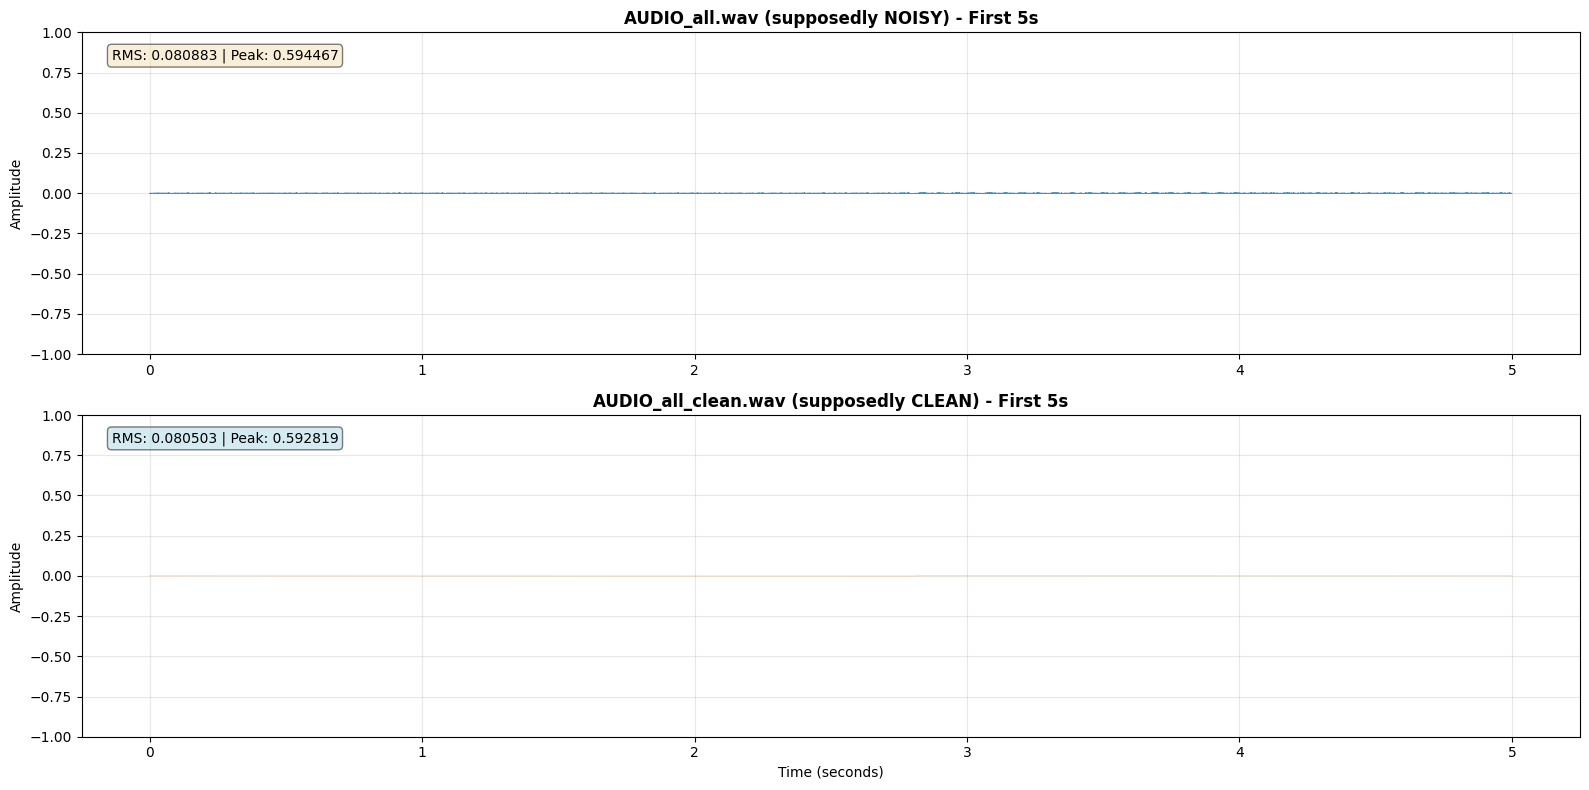


Observation:
  AUDIO_all: Appears to have more variation
  AUDIO_all_clean: Appears to have less variation


In [29]:
if y_noisy is not None and y_clean is not None:
    # Plot first 5 seconds
    duration = 5
    samples = sr * duration
    time_axis = np.arange(samples) / sr
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 8))
    
    # AUDIO_all (noisy)
    axes[0].plot(time_axis, y_noisy[:samples], linewidth=0.3, alpha=0.8)
    axes[0].set_title(f'AUDIO_all.wav (supposedly NOISY) - First {duration}s', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(alpha=0.3)
    axes[0].set_ylim([-1, 1])
    axes[0].text(0.02, 0.95, f'RMS: {noisy_rms:.6f} | Peak: {noisy_peak:.6f}',
                 transform=axes[0].transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # AUDIO_all_clean (clean)
    axes[1].plot(time_axis, y_clean[:samples], linewidth=0.3, alpha=0.8, color='orange')
    axes[1].set_title(f'AUDIO_all_clean.wav (supposedly CLEAN) - First {duration}s', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Amplitude')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].grid(alpha=0.3)
    axes[1].set_ylim([-1, 1])
    axes[1].text(0.02, 0.95, f'RMS: {clean_rms:.6f} | Peak: {clean_peak:.6f}',
                 transform=axes[1].transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nObservation:")
    print(f"  AUDIO_all: Appears to have {('less' if noisy_std < clean_std else 'more')} variation")
    print(f"  AUDIO_all_clean: Appears to have {('less' if clean_std < noisy_std else 'more')} variation")

## Step 4: Spectral Analysis - FFT

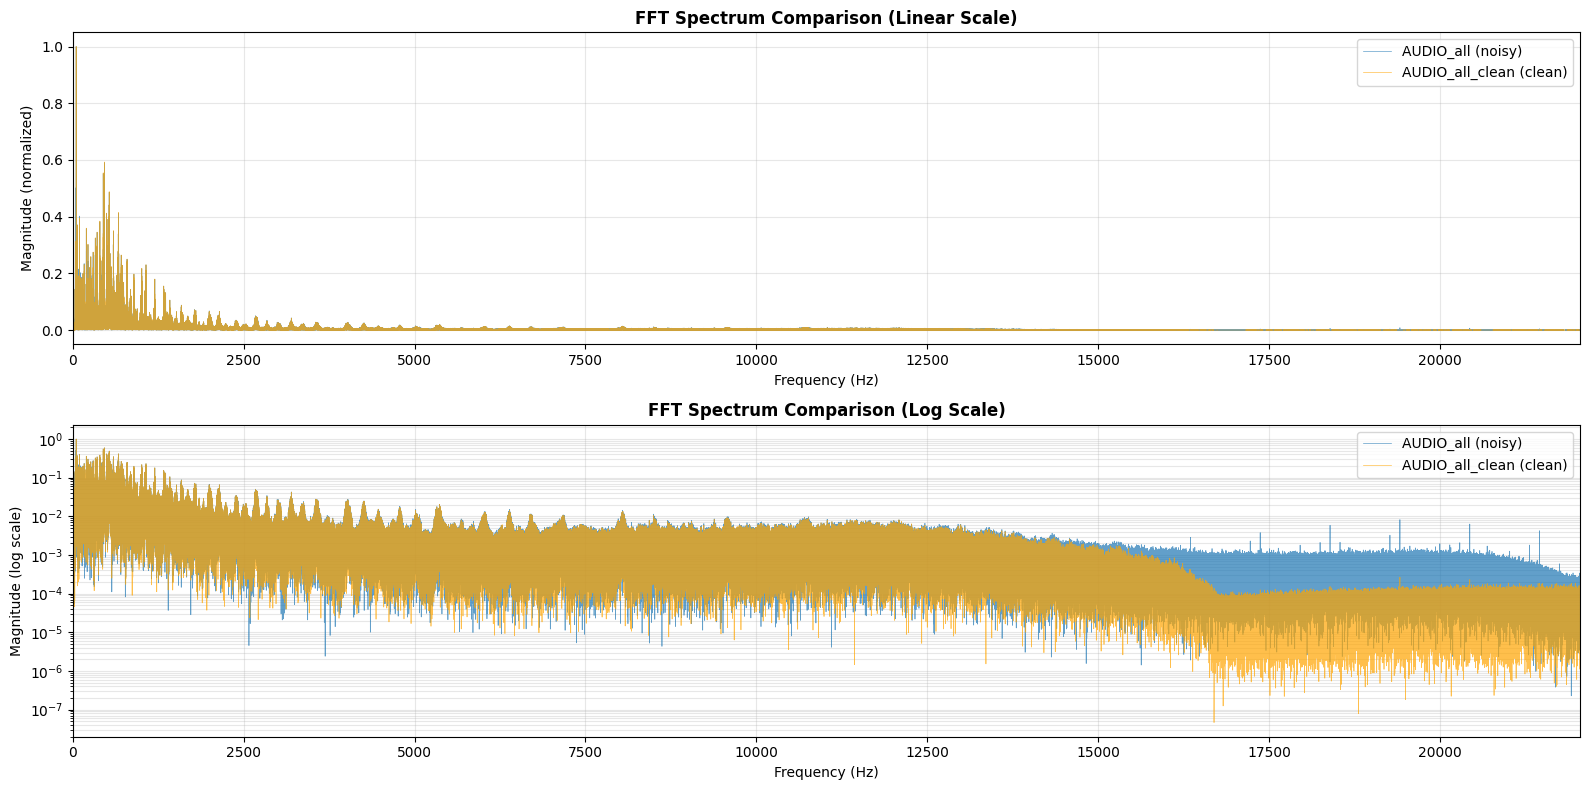


Spectral Analysis:
  AUDIO_all - Energy: 3.28e+02
  AUDIO_all_clean - Energy: 3.23e+02


In [30]:
if y_noisy is not None and y_clean is not None:
    # Compute FFT for both files (using first minute for efficiency)
    window_size = sr * 60  # 1 minute
    
    y_noisy_sample = y_noisy[:window_size]
    y_clean_sample = y_clean[:window_size]
    
    # FFT
    fft_noisy = np.abs(np.fft.fft(y_noisy_sample))
    fft_clean = np.abs(np.fft.fft(y_clean_sample))
    
    freqs = np.fft.fftfreq(len(y_noisy_sample), 1/sr)
    
    # Only positive frequencies
    positive_freq_idx = freqs > 0
    freqs_pos = freqs[positive_freq_idx]
    fft_noisy_pos = fft_noisy[positive_freq_idx]
    fft_clean_pos = fft_clean[positive_freq_idx]
    
    # Normalize
    fft_noisy_pos = fft_noisy_pos / np.max(fft_noisy_pos)
    fft_clean_pos = fft_clean_pos / np.max(fft_clean_pos)
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 8))
    
    # Linear scale
    axes[0].plot(freqs_pos, fft_noisy_pos, linewidth=0.5, alpha=0.7, label='AUDIO_all (noisy)')
    axes[0].plot(freqs_pos, fft_clean_pos, linewidth=0.5, alpha=0.7, label='AUDIO_all_clean (clean)', color='orange')
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('Magnitude (normalized)')
    axes[0].set_title('FFT Spectrum Comparison (Linear Scale)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    axes[0].set_xlim([0, sr/2])
    
    # Log scale
    axes[1].semilogy(freqs_pos, fft_noisy_pos + 1e-8, linewidth=0.5, alpha=0.7, label='AUDIO_all (noisy)')
    axes[1].semilogy(freqs_pos, fft_clean_pos + 1e-8, linewidth=0.5, alpha=0.7, label='AUDIO_all_clean (clean)', color='orange')
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Magnitude (log scale)')
    axes[1].set_title('FFT Spectrum Comparison (Log Scale)', fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3, which='both')
    axes[1].set_xlim([0, sr/2])
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSpectral Analysis:")
    print(f"  AUDIO_all - Energy: {np.sum(fft_noisy_pos**2):.2e}")
    print(f"  AUDIO_all_clean - Energy: {np.sum(fft_clean_pos**2):.2e}")

## Step 5: Spectrogram Analysis

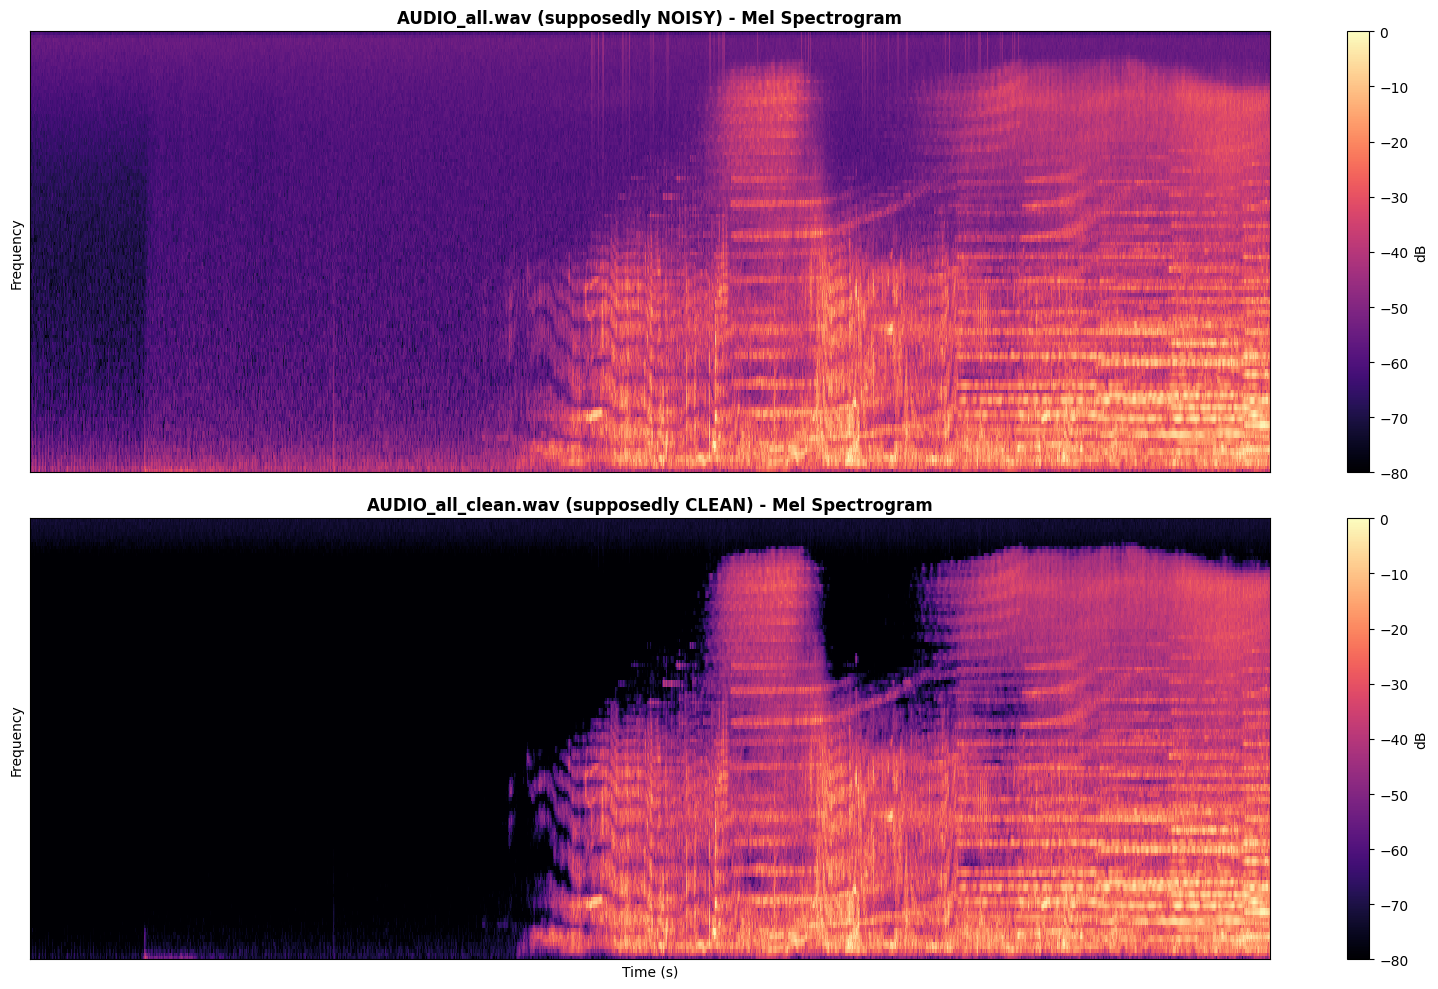


Spectrogram Statistics (first 30s):
  AUDIO_all: Mean=-47.48 dB, Std=14.58 dB
  AUDIO_all_clean: Mean=-58.66 dB, Std=23.04 dB

  Range AUDIO_all: [-80.00, 0.00] dB
  Range AUDIO_all_clean: [-80.00, 0.00] dB


In [31]:
if y_noisy is not None and y_clean is not None:
    # Compute spectrograms
    n_fft = 2048
    hop_length = 512
    
    # Use first 30 seconds for visualization
    duration_spec = 30
    y_noisy_spec = y_noisy[:sr*duration_spec]
    y_clean_spec = y_clean[:sr*duration_spec]
    
    spec_noisy = librosa.feature.melspectrogram(y=y_noisy_spec, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spec_clean = librosa.feature.melspectrogram(y=y_clean_spec, sr=sr, n_fft=n_fft, hop_length=hop_length)
    
    spec_noisy_db = librosa.power_to_db(spec_noisy, ref=np.max(spec_noisy))
    spec_clean_db = librosa.power_to_db(spec_clean, ref=np.max(spec_clean))
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # AUDIO_all spectrogram
    img1 = librosa.display.specshow(spec_noisy_db, sr=sr, hop_length=hop_length, ax=axes[0], cmap='magma')
    axes[0].set_title('AUDIO_all.wav (supposedly NOISY) - Mel Spectrogram', fontweight='bold')
    axes[0].set_ylabel('Frequency')
    plt.colorbar(img1, ax=axes[0], label='dB')
    
    # AUDIO_all_clean spectrogram
    img2 = librosa.display.specshow(spec_clean_db, sr=sr, hop_length=hop_length, ax=axes[1], cmap='magma')
    axes[1].set_title('AUDIO_all_clean.wav (supposedly CLEAN) - Mel Spectrogram', fontweight='bold')
    axes[1].set_ylabel('Frequency')
    axes[1].set_xlabel('Time (s)')
    plt.colorbar(img2, ax=axes[1], label='dB')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSpectrogram Statistics (first {duration_spec}s):")
    print(f"  AUDIO_all: Mean={np.mean(spec_noisy_db):.2f} dB, Std={np.std(spec_noisy_db):.2f} dB")
    print(f"  AUDIO_all_clean: Mean={np.mean(spec_clean_db):.2f} dB, Std={np.std(spec_clean_db):.2f} dB")
    print(f"\n  Range AUDIO_all: [{np.min(spec_noisy_db):.2f}, {np.max(spec_noisy_db):.2f}] dB")
    print(f"  Range AUDIO_all_clean: [{np.min(spec_clean_db):.2f}, {np.max(spec_clean_db):.2f}] dB")

## Step 6: Noise Floor Analysis

In [32]:
if y_noisy is not None and y_clean is not None:
    # Compute noise floor using percentiles of amplitude
    percentiles = [5, 10, 25, 50, 75, 90, 95]
    
    print("="*80)
    print("NOISE FLOOR ANALYSIS (Amplitude Percentiles)")
    print("="*80)
    
    print(f"\n{'Percentile':<15} {'AUDIO_all (noisy)':<25} {'AUDIO_all_clean (clean)':<25}")
    print("-" * 65)
    
    for p in percentiles:
        noisy_p = np.percentile(np.abs(y_noisy), p)
        clean_p = np.percentile(np.abs(y_clean), p)
        print(f"{p}th %ile{'':<7} {noisy_p:<25.8f} {clean_p:<25.8f}")
    
    # Estimate noise floor (quiet parts)
    noisy_noise_floor = np.percentile(np.abs(y_noisy), 25)
    clean_noise_floor = np.percentile(np.abs(y_clean), 25)
    
    print(f"\nEstimated Noise Floor (25th percentile):")
    print(f"  AUDIO_all: {noisy_noise_floor:.8f}")
    print(f"  AUDIO_all_clean: {clean_noise_floor:.8f}")
    print(f"  Ratio (noisy/clean): {noisy_noise_floor/clean_noise_floor:.4f}")
    
    # Signal to noise ratio (simple estimate)
    snr_noisy = 20*np.log10(noisy_peak / (noisy_noise_floor + 1e-8))
    snr_clean = 20*np.log10(clean_peak / (clean_noise_floor + 1e-8))
    
    print(f"\nEstimated SNR (Peak / Noise Floor):")
    print(f"  AUDIO_all: {snr_noisy:.2f} dB")
    print(f"  AUDIO_all_clean: {snr_clean:.2f} dB")

NOISE FLOOR ANALYSIS (Amplitude Percentiles)

Percentile      AUDIO_all (noisy)         AUDIO_all_clean (clean)  
-----------------------------------------------------------------
5th %ile        0.00067139                0.00007629               
10th %ile        0.00279236                0.00267029               
25th %ile        0.01597595                0.01574707               
50th %ile        0.04421997                0.04380798               
75th %ile        0.08709717                0.08654785               
90th %ile        0.13615417                0.13555908               
95th %ile        0.16921997                0.16859436               

Estimated Noise Floor (25th percentile):
  AUDIO_all: 0.01597595
  AUDIO_all_clean: 0.01574707
  Ratio (noisy/clean): 1.0145

Estimated SNR (Peak / Noise Floor):
  AUDIO_all: 31.41 dB
  AUDIO_all_clean: 31.51 dB


## Step 7: Difference and Residual Analysis

DIFFERENCE ANALYSIS

Difference (AUDIO_all - AUDIO_all_clean):
  RMS: 0.00342922
  Peak: 0.05091858
  Std Dev: 0.00342922
  Mean: -0.00000013

Cross-correlation: 0.999108
  → Files are nearly identical (very similar)


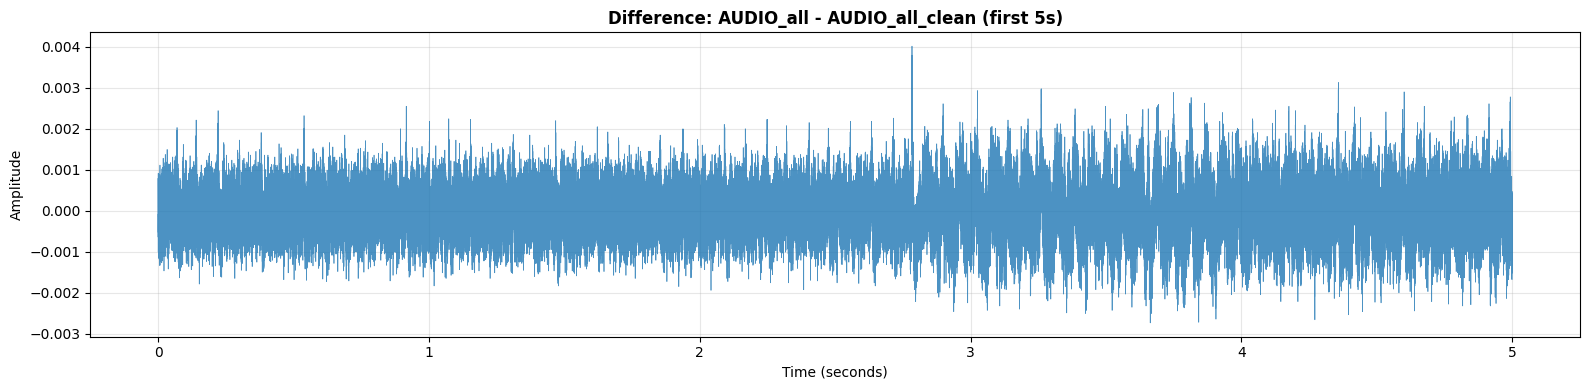

In [33]:
if y_noisy is not None and y_clean is not None:
    # Check if files are identical or related
    if len(y_noisy) == len(y_clean):
        print("="*80)
        print("DIFFERENCE ANALYSIS")
        print("="*80)
        
        difference = y_noisy - y_clean
        
        diff_rms = np.sqrt(np.mean(difference**2))
        diff_peak = np.max(np.abs(difference))
        diff_std = np.std(difference)
        
        print(f"\nDifference (AUDIO_all - AUDIO_all_clean):")
        print(f"  RMS: {diff_rms:.8f}")
        print(f"  Peak: {diff_peak:.8f}")
        print(f"  Std Dev: {diff_std:.8f}")
        print(f"  Mean: {np.mean(difference):.8f}")
        
        # Cross-correlation to check similarity
        correlation = np.corrcoef(y_noisy, y_clean)[0, 1]
        print(f"\nCross-correlation: {correlation:.6f}")
        
        if correlation > 0.99:
            print("  → Files are nearly identical (very similar)")
        elif correlation > 0.95:
            print("  → Files are highly correlated (similar with slight differences)")
        elif correlation > 0.85:
            print("  → Files are moderately correlated (some differences)")
        else:
            print(f"  → Files are weakly correlated (very different) - may be independent recordings")
        
        # Plot difference
        fig, ax = plt.subplots(figsize=(16, 4))
        duration = 5
        samples = sr * duration
        time_axis = np.arange(samples) / sr
        
        ax.plot(time_axis, difference[:samples], linewidth=0.5, alpha=0.8)
        ax.set_title(f'Difference: AUDIO_all - AUDIO_all_clean (first {duration}s)', fontweight='bold')
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel('Amplitude')
        ax.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nFiles have different lengths:")
        print(f"  AUDIO_all: {len(y_noisy)} samples")
        print(f"  AUDIO_all_clean: {len(y_clean)} samples")
        print(f"  → Cannot compute direct difference")

## Step 8: Summary and Diagnosis

In [34]:
if y_noisy is not None and y_clean is not None:
    print("\n" + "="*80)
    print("DIAGNOSTIC SUMMARY")
    print("="*80)
    
    print("\n📊 AMPLITUDE METRICS:")
    print(f"  AUDIO_all (noisy) RMS: {noisy_rms:.6f}")
    print(f"  AUDIO_all_clean (clean) RMS: {clean_rms:.6f}")
    print(f"  Ratio: {noisy_rms/clean_rms:.4f}")
    
    if noisy_rms > clean_rms:
        print(f"  ✓ AUDIO_all is LOUDER (consistent with 'noisy' label)")
    else:
        print(f"  ✗ AUDIO_all_clean is LOUDER (inconsistent with labels!)")
    
    print(f"\n📊 NOISE FLOOR (25th percentile):")
    print(f"  AUDIO_all: {noisy_noise_floor:.8f}")
    print(f"  AUDIO_all_clean: {clean_noise_floor:.8f}")
    print(f"  Ratio: {noisy_noise_floor/clean_noise_floor:.4f}")
    
    if noisy_noise_floor > clean_noise_floor:
        print(f"  ✓ AUDIO_all has HIGHER noise floor (consistent with 'noisy' label)")
    else:
        print(f"  ✗ AUDIO_all_clean has HIGHER noise floor (inconsistent with labels!)")
    
    print(f"\n📊 FREQUENCY ANALYSIS:")
    noisy_energy = np.sum(fft_noisy_pos**2)
    clean_energy = np.sum(fft_clean_pos**2)
    print(f"  AUDIO_all spectral energy: {noisy_energy:.2e}")
    print(f"  AUDIO_all_clean spectral energy: {clean_energy:.2e}")
    print(f"  Ratio: {noisy_energy/clean_energy:.4f}")
    
    print(f"\n📊 CONCLUSION:")
    print()
    
    # Scoring system
    score = 0
    reasons = []
    
    if noisy_rms > clean_rms:
        score += 1
        reasons.append("✓ AUDIO_all has higher RMS")
    else:
        score -= 1
        reasons.append("✗ AUDIO_all has lower RMS")
    
    if noisy_noise_floor > clean_noise_floor:
        score += 1
        reasons.append("✓ AUDIO_all has higher noise floor")
    else:
        score -= 1
        reasons.append("✗ AUDIO_all has lower noise floor")
    
    if noisy_std > clean_std:
        score += 1
        reasons.append("✓ AUDIO_all has higher standard deviation")
    else:
        score -= 1
        reasons.append("✗ AUDIO_all has lower standard deviation")
    
    for reason in reasons:
        print(f"  {reason}")
    
    print()
    if score >= 2:
        print("✅ LABELS APPEAR CORRECT: AUDIO_all is likely noisy, AUDIO_all_clean is likely clean")
    elif score == 1:
        print("⚠️  LABELS PARTIALLY CORRECT: Some metrics suggest labels may be reversed or mixed")
    elif score == 0:
        print("⚠️  LABELS UNCERTAIN: Mixed signals - need more investigation")
    else:
        print("❌ LABELS APPEAR REVERSED: AUDIO_all seems cleaner, AUDIO_all_clean seems noisier!")
    
    print(f"\n  Confidence Score: {score}/3")


DIAGNOSTIC SUMMARY

📊 AMPLITUDE METRICS:
  AUDIO_all (noisy) RMS: 0.080883
  AUDIO_all_clean (clean) RMS: 0.080503
  Ratio: 1.0047
  ✓ AUDIO_all is LOUDER (consistent with 'noisy' label)

📊 NOISE FLOOR (25th percentile):
  AUDIO_all: 0.01597595
  AUDIO_all_clean: 0.01574707
  Ratio: 1.0145
  ✓ AUDIO_all has HIGHER noise floor (consistent with 'noisy' label)

📊 FREQUENCY ANALYSIS:
  AUDIO_all spectral energy: 3.28e+02
  AUDIO_all_clean spectral energy: 3.23e+02
  Ratio: 1.0129

📊 CONCLUSION:

  ✓ AUDIO_all has higher RMS
  ✓ AUDIO_all has higher noise floor
  ✓ AUDIO_all has higher standard deviation

✅ LABELS APPEAR CORRECT: AUDIO_all is likely noisy, AUDIO_all_clean is likely clean

  Confidence Score: 3/3


## Step 9: Training Data Suitability

In [35]:
if y_noisy is not None and y_clean is not None:
    print("\n" + "="*80)
    print("TRAINING DATA SUITABILITY CHECK")
    print("="*80)
    
    print(f"\nAre these files suitable for training a denoising model?")
    print()
    
    checks = []
    
    # Check 1: File length
    total_duration = (len(y_noisy) + len(y_clean)) / sr
    print(f"1. Total duration: {total_duration:.1f}s")
    if total_duration > 600:
        print(f"   ✓ Good amount of data (>10 min recommended)")
        checks.append(True)
    else:
        print(f"   ✗ Limited data (<10 min)")
        checks.append(False)
    
    # Check 2: Audio quality
    print(f"\n2. Audio quality check:")
    print(f"   Sample rate: {sr} Hz")
    if sr >= 44100:
        print(f"   ✓ Adequate sample rate")
        checks.append(True)
    else:
        print(f"   ✗ Low sample rate")
        checks.append(False)
    
    # Check 3: Alignment
    print(f"\n3. File alignment:")
    if len(y_noisy) == len(y_clean):
        print(f"   ✓ Files have same length - properly aligned for training")
        checks.append(True)
    else:
        print(f"   ✗ Files have different lengths (not aligned)")
        print(f"     AUDIO_all: {len(y_noisy)} samples")
        print(f"     AUDIO_all_clean: {len(y_clean)} samples")
        checks.append(False)
    
    # Check 4: Noise characteristics
    print(f"\n4. Noise characteristics:")
    if noisy_rms > clean_rms and noisy_noise_floor > clean_noise_floor:
        print(f"   ✓ Noisy file has higher amplitude and noise floor - good for training")
        checks.append(True)
    else:
        print(f"   ✗ Noise characteristics unclear or inconsistent")
        checks.append(False)
    
    # Check 5: SNR difference
    print(f"\n5. SNR difference:")
    snr_diff = snr_clean - snr_noisy
    print(f"   AUDIO_all SNR: {snr_noisy:.2f} dB")
    print(f"   AUDIO_all_clean SNR: {snr_clean:.2f} dB")
    print(f"   Difference: {snr_diff:.2f} dB")
    if snr_diff > 3:
        print(f"   ✓ Significant SNR difference (good for training)")
        checks.append(True)
    else:
        print(f"   ⚠️  Limited SNR difference (may be hard to train)")
        checks.append(False)
    
    print(f"\n" + "-"*80)
    passed = sum(checks)
    total = len(checks)
    print(f"\nSuitability Score: {passed}/{total}")
    
    if passed == total:
        print("✅ EXCELLENT: These files are well-suited for training a denoising model")
    elif passed >= 4:
        print("✓ GOOD: These files can be used for training, with some considerations")
    elif passed >= 2:
        print("⚠️  ACCEPTABLE: Training possible but may require careful setup")
    else:
        print("❌ POOR: These files may not be ideal for training")


TRAINING DATA SUITABILITY CHECK

Are these files suitable for training a denoising model?

1. Total duration: 12028.8s
   ✓ Good amount of data (>10 min recommended)

2. Audio quality check:
   Sample rate: 44100 Hz
   ✓ Adequate sample rate

3. File alignment:
   ✓ Files have same length - properly aligned for training

4. Noise characteristics:
   ✓ Noisy file has higher amplitude and noise floor - good for training

5. SNR difference:
   AUDIO_all SNR: 31.41 dB
   AUDIO_all_clean SNR: 31.51 dB
   Difference: 0.10 dB
   ⚠️  Limited SNR difference (may be hard to train)

--------------------------------------------------------------------------------

Suitability Score: 4/5
✓ GOOD: These files can be used for training, with some considerations
